# Прв парцијален испит по Роботика 1

Датум: 14.04.2021

## Задача 4

**(25 поени)** За дадена почетна положба $\theta_1 = \theta_3 = 0$ и $d_2 = 5$, да се одреди новата положба на раката како резултат на диференцијалните транслации $\bf{d} = \begin{bmatrix} 0.2 & 0.1 & 0.3 \end{bmatrix} ^ \top$ и диференцијалните ротации $\bf{\delta} = \begin{bmatrix} 0 & 0.1 & 0.2 \end{bmatrix} ^ \top$. Потоа да се определи диференцијалниот оператор ${}^\bf{3}\Delta$.

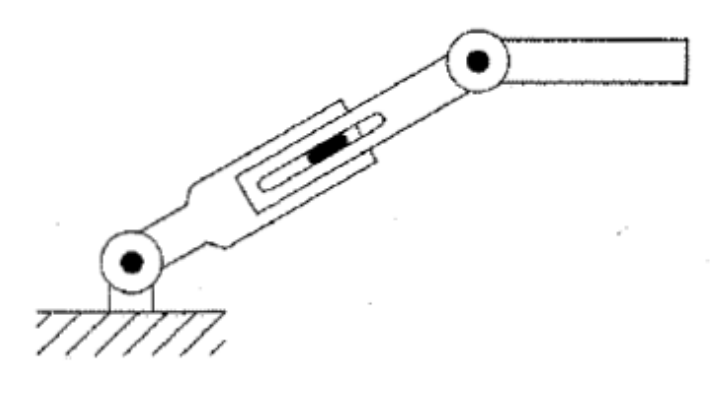

In [1]:
from IPython import display
display.Image('images/2.png', width=450)

## Решение

In [18]:
import sympy as sp
import script as rt
import numpy as nu

In [14]:
theta1,theta2,theta3,a1,d2=sp.symbols('theta1,theta2,theta3,a1,d2')
robot=rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,0,sp.pi/2)
robot.add_prismatic_joint(0,d2,0,-sp.pi/2)
robot.add_revolute_joint(theta3,0,a1,0)
robot.add_subs([(a1,1)])
robot.interact()

In [16]:
T=robot.get_dh_matrix()
T

Matrix([
[cos(theta1 + theta3), -sin(theta1 + theta3), 0, a1*cos(theta1 + theta3) + d2*sin(theta1)],
[sin(theta1 + theta3),  cos(theta1 + theta3), 0, a1*sin(theta1 + theta3) - d2*cos(theta1)],
[                   0,                     0, 1,                                        0],
[                   0,                     0, 0,                                        1]])

In [17]:
delta=rt.hdelta3(0,0.1,0.2,0.2,0.1,0.3)

In [19]:
I=nu.identity(4)
T_nova=(I+delta)*T
T_nova

Matrix([
[-0.2*sin(theta1 + theta3) + 1.0*cos(theta1 + theta3), -1.0*sin(theta1 + theta3) - 0.2*cos(theta1 + theta3), 0.1, -0.2*a1*sin(theta1 + theta3) + 1.0*a1*cos(theta1 + theta3) + 1.0*d2*sin(theta1) + 0.2*d2*cos(theta1) + 0.2],
[ 1.0*sin(theta1 + theta3) + 0.2*cos(theta1 + theta3), -0.2*sin(theta1 + theta3) + 1.0*cos(theta1 + theta3),   0,  1.0*a1*sin(theta1 + theta3) + 0.2*a1*cos(theta1 + theta3) + 0.2*d2*sin(theta1) - 1.0*d2*cos(theta1) + 0.1],
[                           -0.1*cos(theta1 + theta3),                             0.1*sin(theta1 + theta3), 1.0,                                                    -0.1*a1*cos(theta1 + theta3) - 0.1*d2*sin(theta1) + 0.3],
[                                                   0,                                                    0,   0,                                                                                                        1.0]])

In [23]:
T3=robot.get_dh_joint_to_joint(2,3)
T3.subs([(theta1,0),(theta3,0),(d2,0),(a1,1)])

Matrix([
[1, 0, 0, a1],
[0, 1, 0,  0],
[0, 0, 1,  0],
[0, 0, 0,  1]])

In [25]:
T3.subs([(theta1,0),(theta3,0),(d2,0),(a1,1)]).inv()*delta*T3.subs([(theta1,0),(theta3,0),(d2,0),(a1,1)])

Matrix([
[   0, -0.2, 0.1, 0.2],
[ 0.2,    0,   0, 0.3],
[-0.1,    0,   0, 0.2],
[   0,    0,   0,   0]])